In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bokeh.models import Band, ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

%matplotlib inline

Loading BokehJS ...

In [2]:
df = pd.read_csv('qmean_reference/qmean_refrence.csv')
qmean_ref = df[df['qmean4_norm'] > 0.5].sort_values(by='protein_size')

In [116]:
qmean_ref['y_rolling3_mean'] = qmean_ref.qmean4_norm.rolling(200).mean()
qmean_ref['y_rolling3_std'] = qmean_ref.qmean4_norm.rolling(200).std()
qmean_ref['lower'] = qmean_ref.y_rolling3_mean - qmean_ref.y_rolling3_std
qmean_ref['upper'] = qmean_ref.y_rolling3_mean + qmean_ref.y_rolling3_std

In [117]:
x2 = [40, 17, 15]
y2 = [0.75, 0.8, 0.6]

source = ColumnDataSource(qmean_ref.reset_index())

TOOLTIPS = [
            ("protein_size", "$protein_size"),
            ("y_rolling3_mean", "$y_rolling3_mean"),
            ]

p = figure(x_range=(10, 200), tools='hover,wheel_zoom', tooltips=TOOLTIPS, y_range=(0.5, 1))
p.title.text = "Rolling Standard Deviation"
p.xgrid.grid_line_color=None
p.ygrid.grid_line_alpha=0.5

p.scatter(x2, y2, color='red', marker="dot", size=12)

p.line("protein_size", "y_rolling3_mean", line_dash=(10, 7), line_width=2, source=source)

band = Band(base="protein_size", lower="lower", upper="upper", source=source,
            fill_alpha=0.3, fill_color="yellow", line_color="black")
p.add_layout(band)

show(p)

In [3]:
df

model_name  protein_size  qmean4_zscore  qmean4_norm  qmeandisco
0     3EO4_B.pdb           150          -0.32         0.77        0.89
1     7C2G_G.pdb           196          -0.44         0.76        0.87
2     4GQM_A.pdb           105           0.12         0.80        0.80
3     8BUY_A.pdb           134          -1.02         0.73        0.83
4     2HRV_A.pdb           139          -0.75         0.74        0.84
...          ...           ...            ...          ...         ...
3475  1S7I_A.pdb           124           0.81         0.83        0.81
3476  4U9N_A.pdb           177          -1.94         0.70        0.76
3477  2ARC_A.pdb           161           0.56         0.81        0.90
3478  6EWL_A.pdb           136          -0.57         0.75        0.81
3479  3S3T_A.pdb           144           0.68         0.82        0.90

[3480 rows x 5 columns]

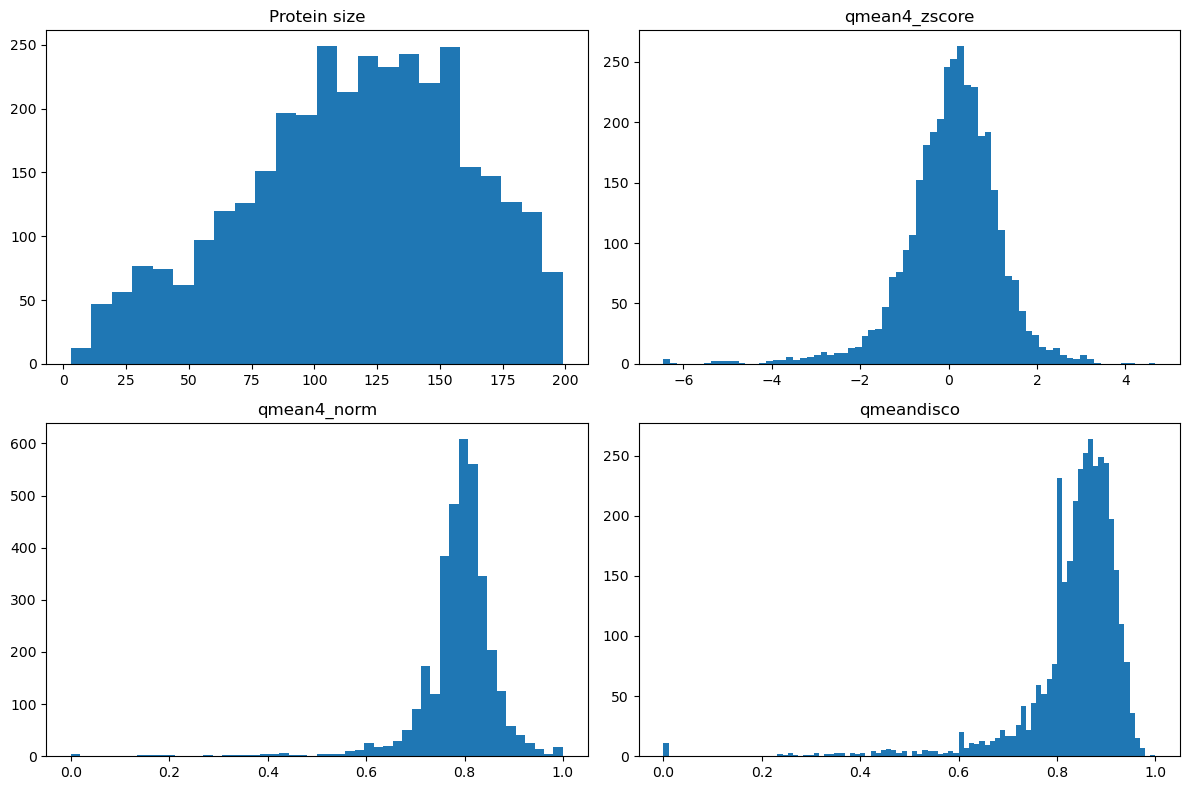

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

n_bins = np.histogram_bin_edges(df.protein_size, bins='fd')
axs[0,0].hist(df.protein_size, bins=n_bins)
axs[0,0].set_title('Protein size')

n_bins = np.histogram_bin_edges(df.qmean4_zscore, bins='fd')
axs[0,1].hist(df.qmean4_zscore, bins=n_bins)
axs[0,1].set_title('qmean4_zscore')

n_bins = np.histogram_bin_edges(df.qmean4_norm, bins='scott')
axs[1,0].hist(df.qmean4_norm, bins=n_bins)
axs[1,0].set_title('qmean4_norm')

n_bins = np.histogram_bin_edges(df.qmeandisco, bins='fd')
axs[1,1].hist(df.qmeandisco, bins=n_bins)
axs[1,1].set_title('qmeandisco')

fig.tight_layout()
plt.show()

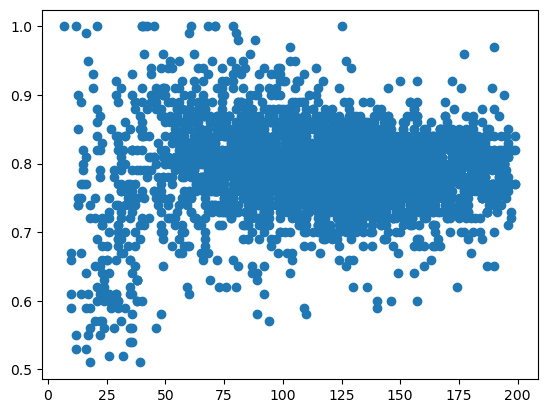

In [114]:


fig, ax = plt.subplots()
#ax.boxplot(qmean_ref.qmean4_norm)
ax.plot(qmean_ref.protein_size, qmean_ref.qmean4_norm, 'o')
#ax.set_ylim(0, 1.5)
plt.show()